Size of image is :(660, 1000)


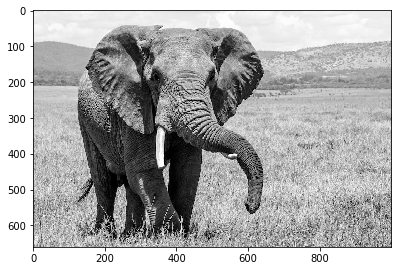

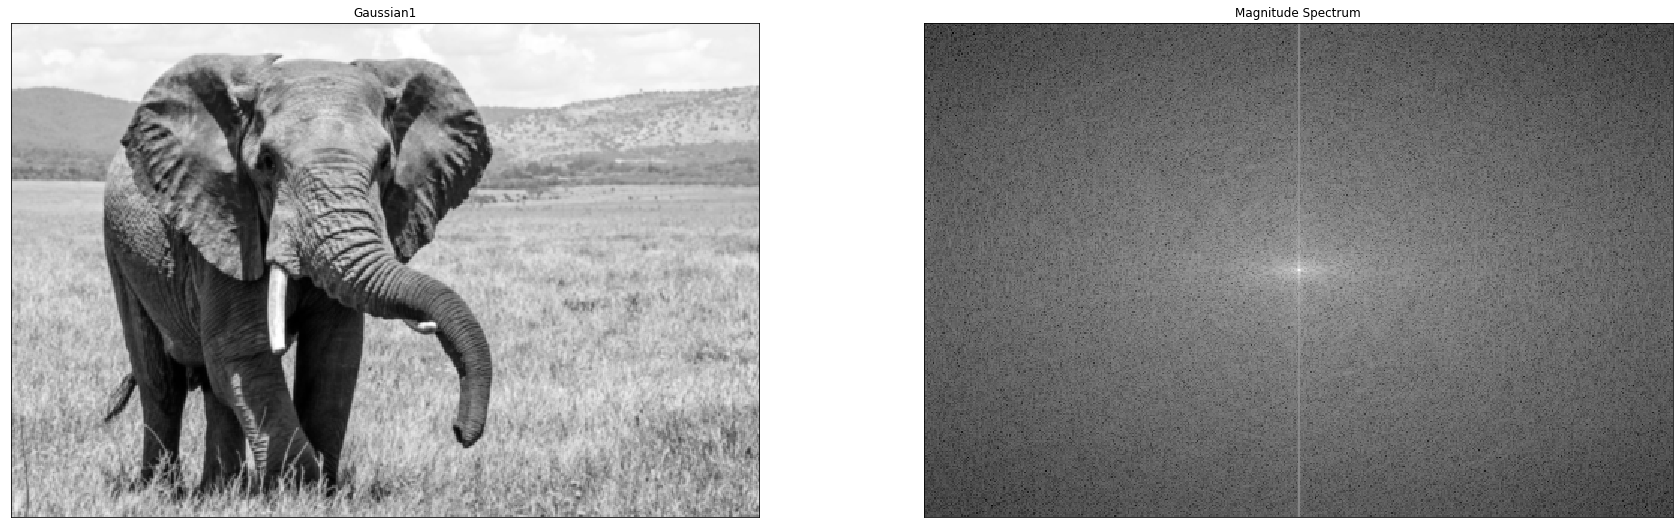

Size of image is :(330, 500)


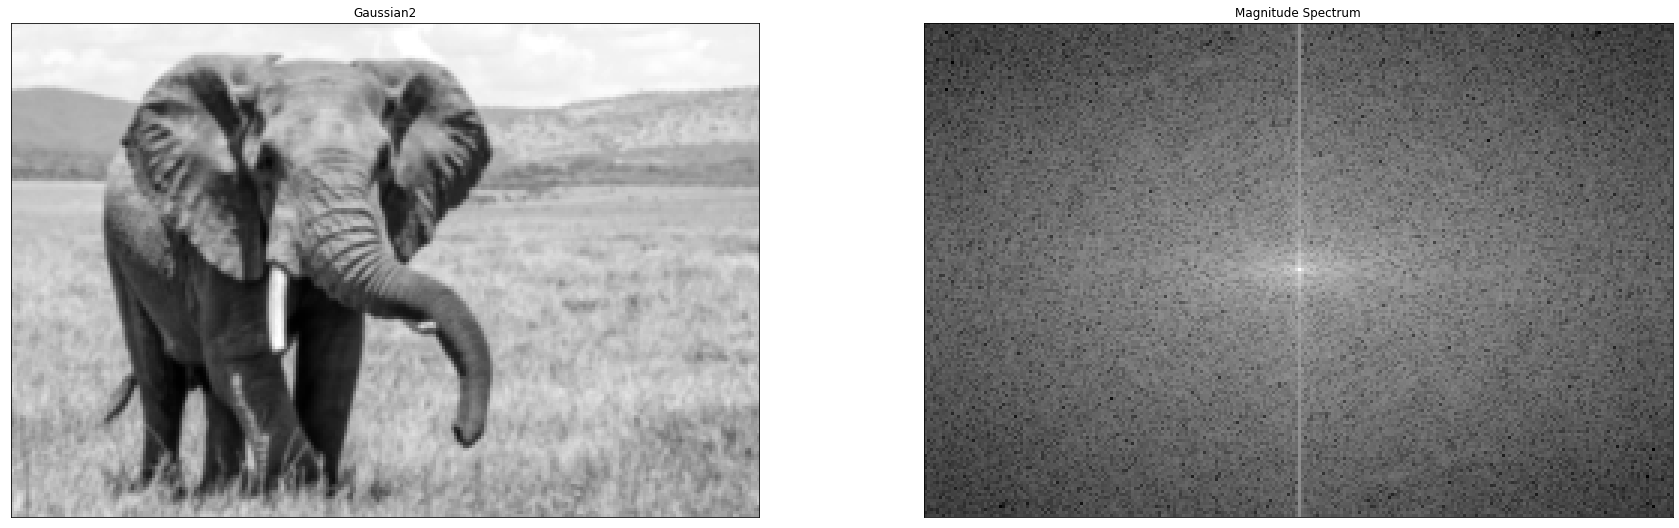

Size of image is :(165, 250)


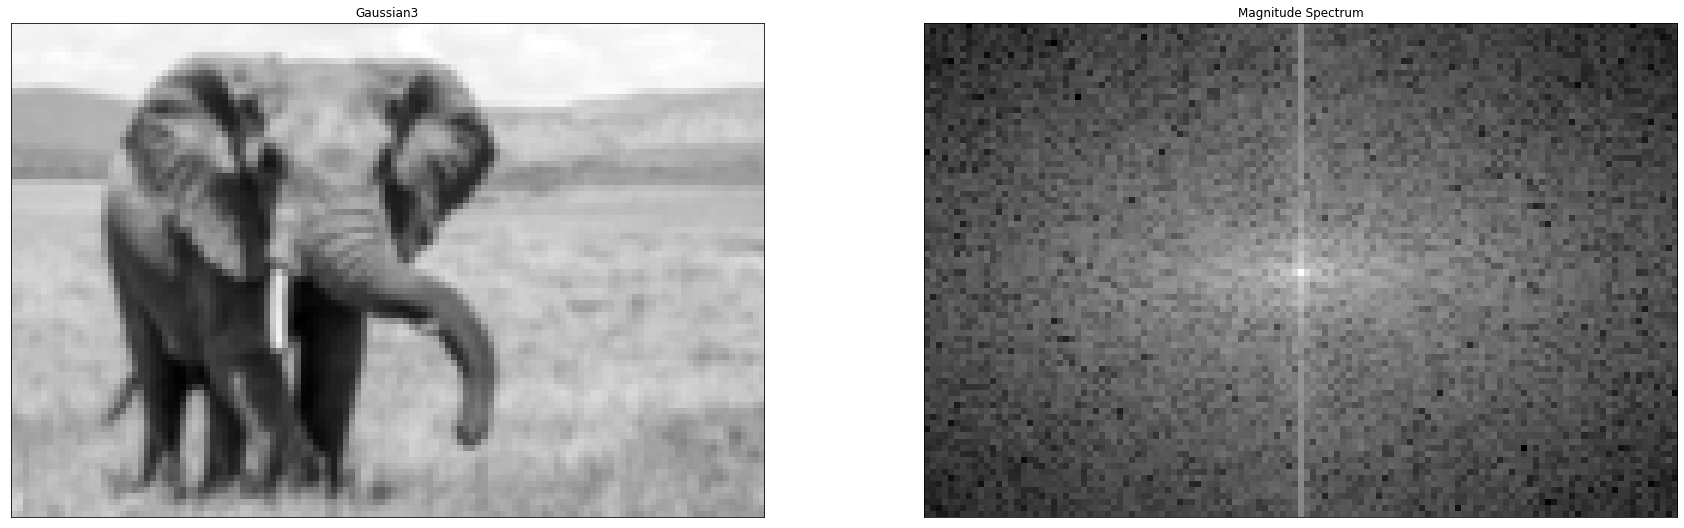

Size of image is :(82, 125)


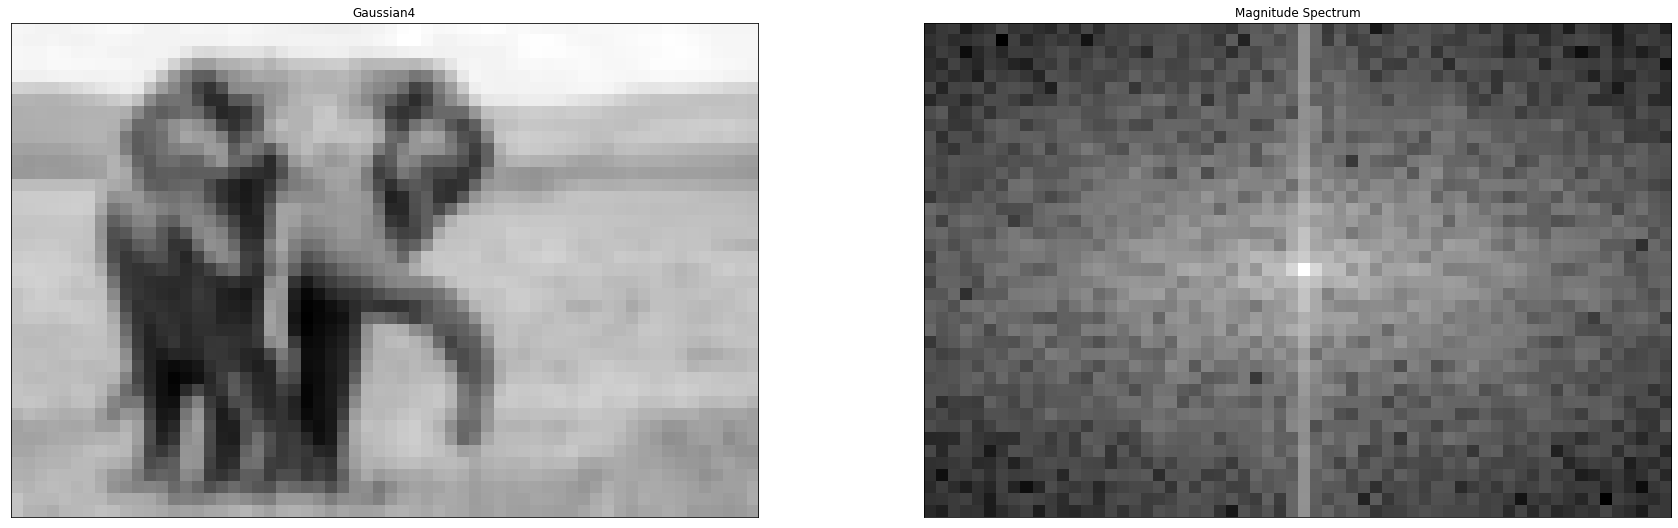

Size of image is :(41, 62)


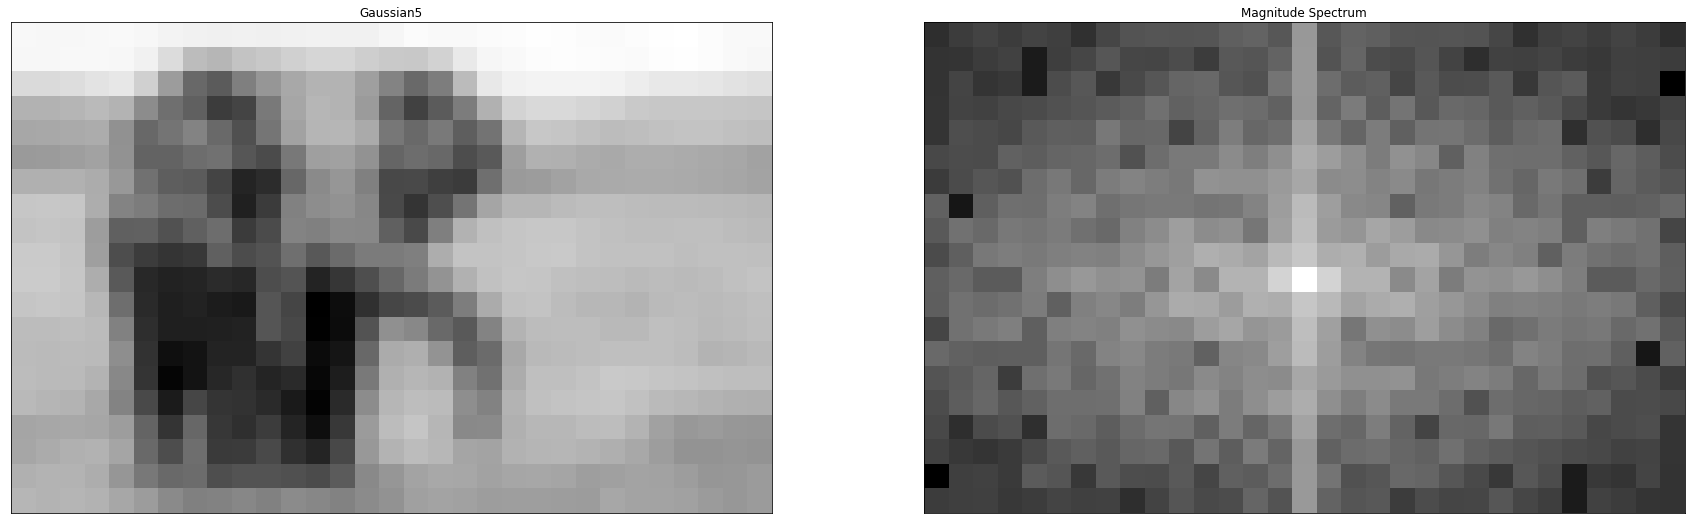

Size of image is :(20, 31)


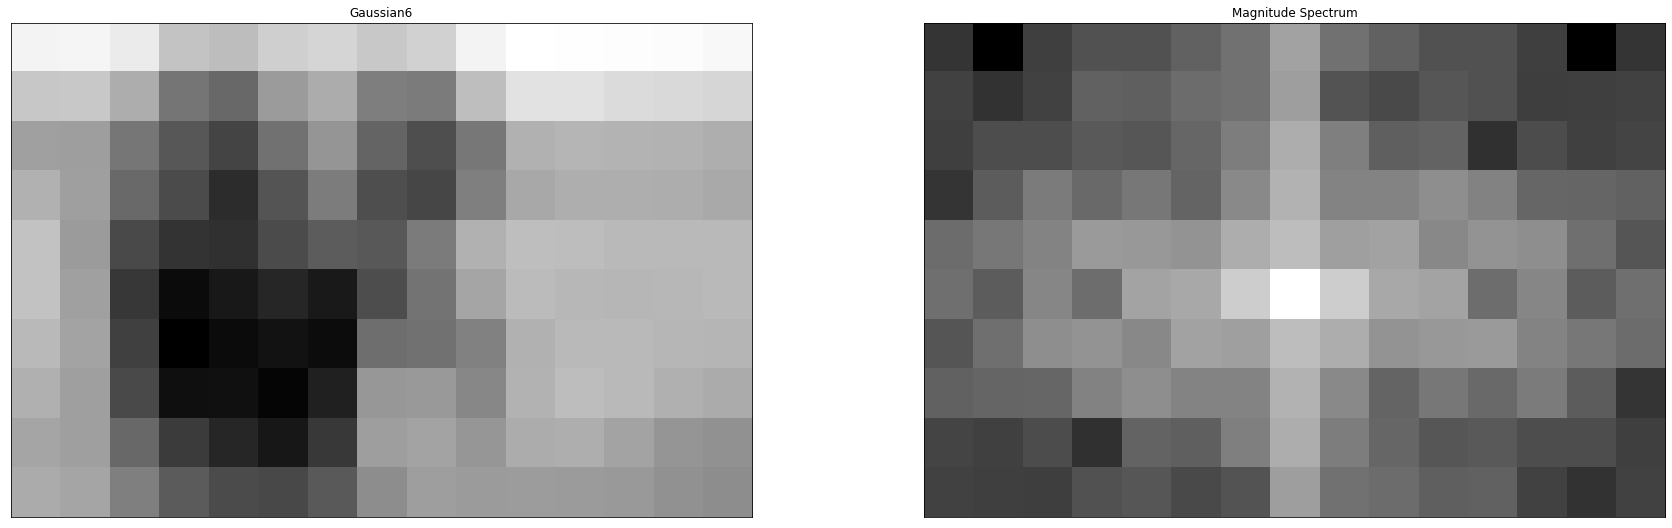

Size of image is :(10, 15)


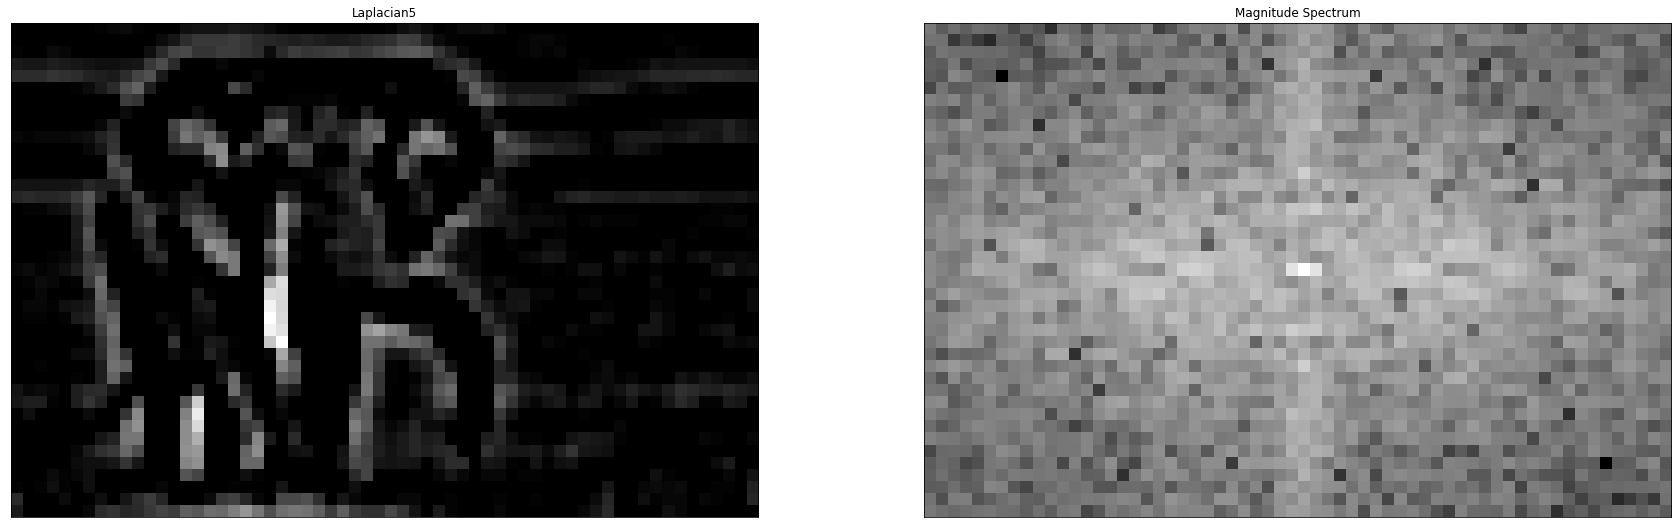

Size of image is :(41, 62)


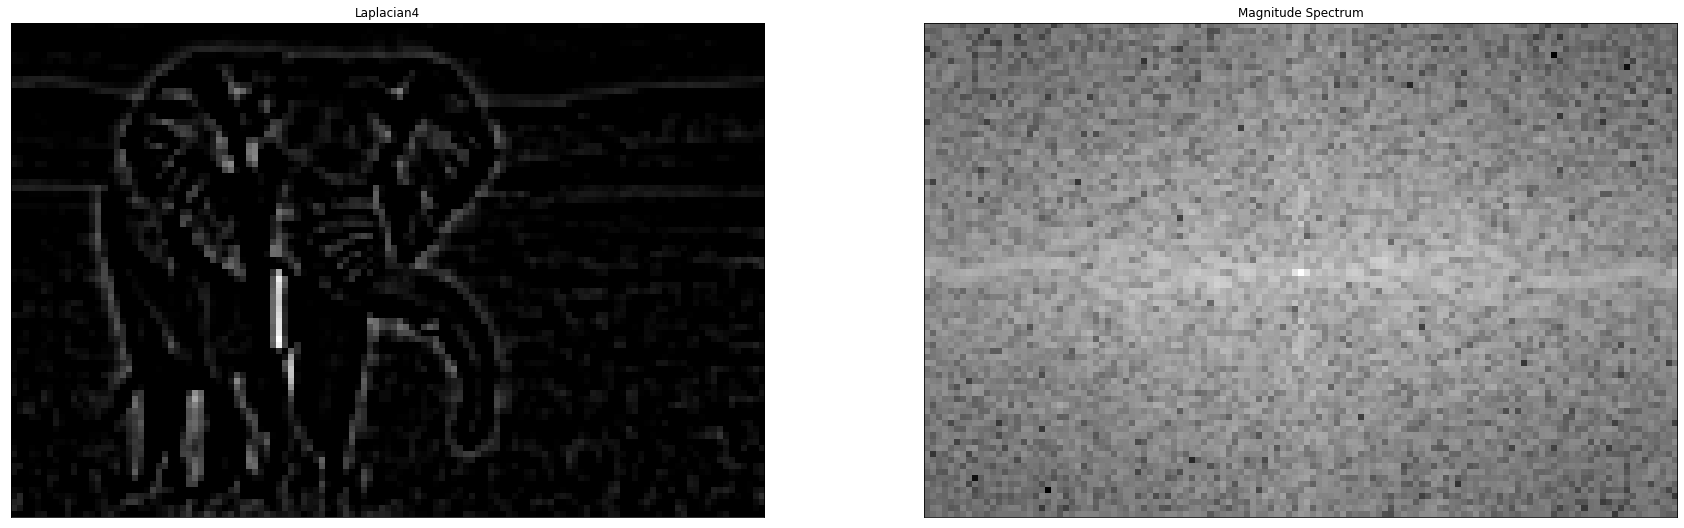

Size of image is :(82, 125)


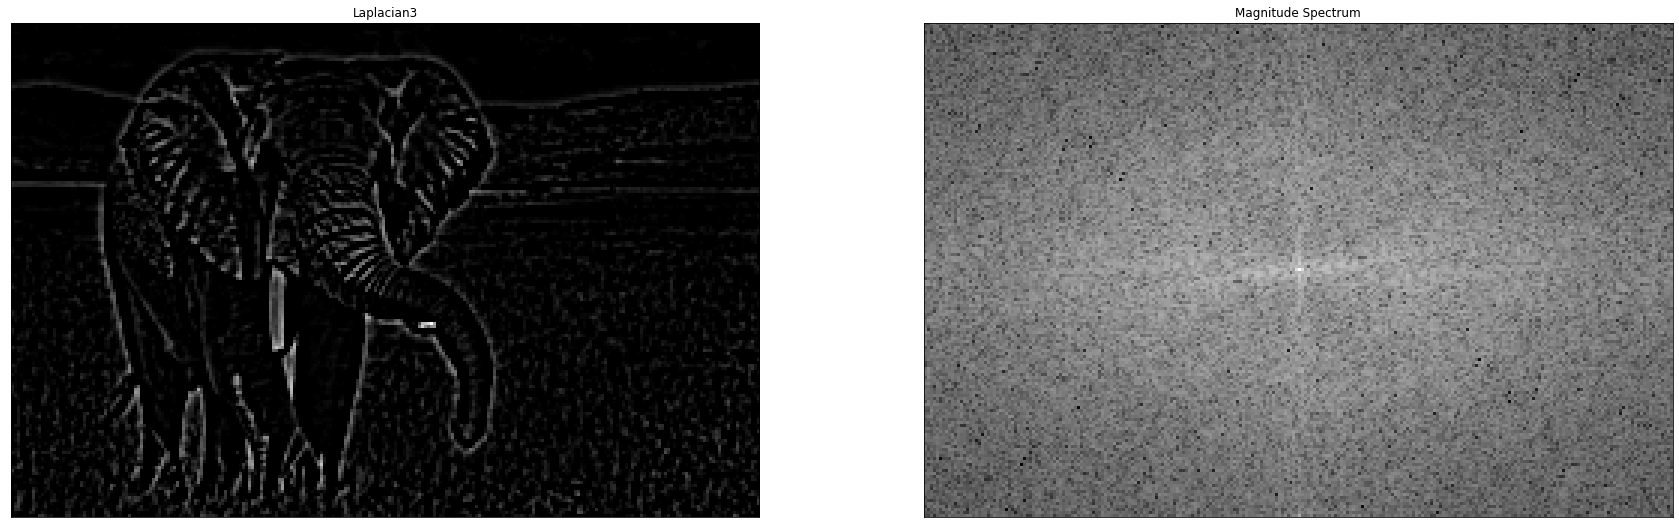

Size of image is :(165, 250)


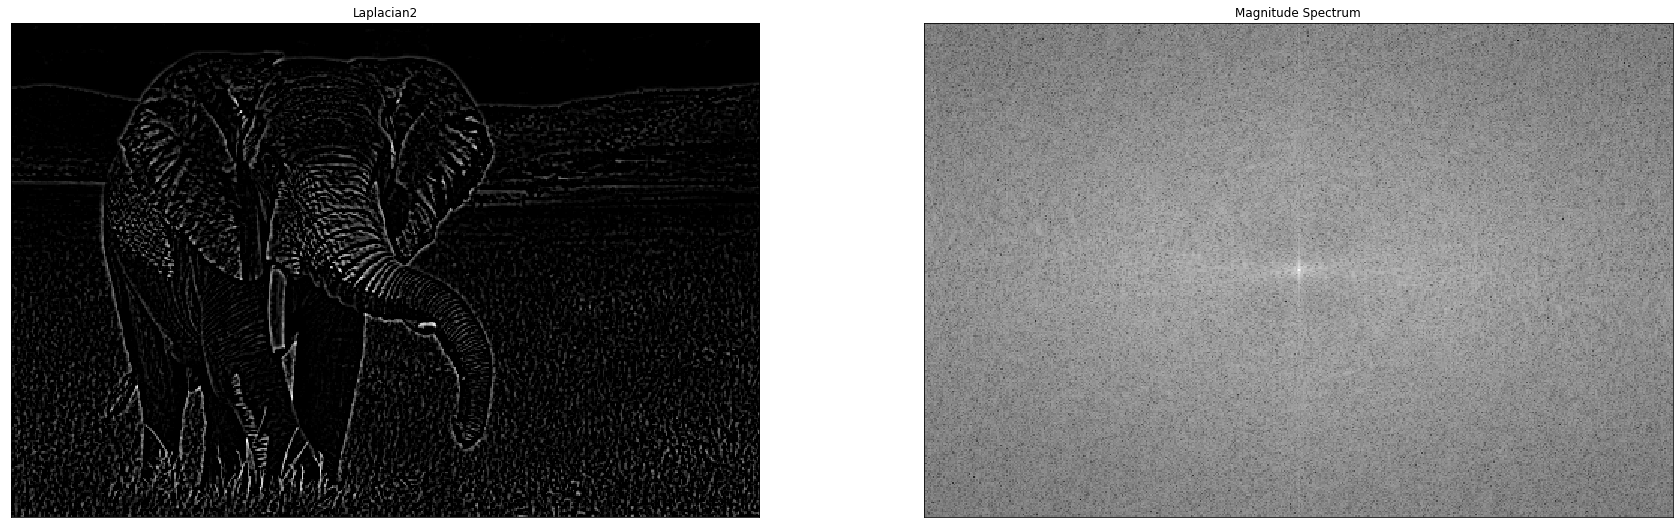

Size of image is :(330, 500)


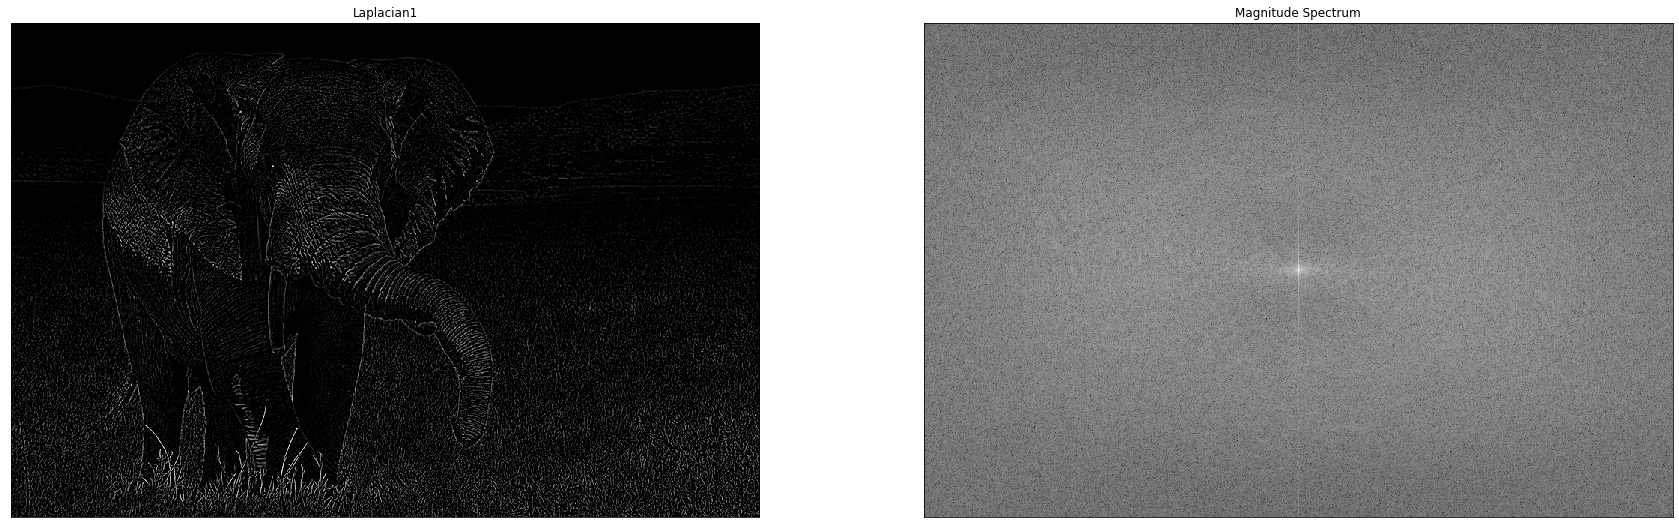

Size of image is :(660, 1000)


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

A  = cv2.imread('D:\Downloads\Documents\CV\elephant.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(30,20))
G = A.copy()
plt.subplot(431),plt.imshow(A, cmap = 'gray')
#plt.title('Gaussian Original'), plt.xticks([]), plt.yticks([])
#plt.show()
GA = [G]
print('Size of image is :'+str(G.shape))
for i in range(6):
    plt.figure(figsize=(30,20))
    G = cv2.GaussianBlur(G,(5,5),1)
    G = cv2.resize(G,(G.shape[1]//2,G.shape[0]//2))
    GA.append(G)
    #cv2.imshow('Gaussian'+str(i+1),G)
    f = np.fft.fft2(G)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(221),plt.imshow(G, cmap = 'gray')
    plt.title('Gaussian'+str(i+1)), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    print('Size of image is :'+str(G.shape))
result = GA[1]
for i in range(5):
    img = np.zeros((GA[i+2].shape[0],GA[1].shape[1]),dtype = 'uint8')
    img[:GA[i+2].shape[0],:GA[i+2].shape[1]] = GA[i+2]
    result = np.vstack((result,img))
img = np.zeros((GA[0].shape[0],GA[1].shape[1]),dtype = 'uint8')
img[:result.shape[0],:result.shape[1]] = result
final_image = np.hstack((GA[0],img))
cv2.imshow('Gaussian_Pyramid',final_image)
cv2.imwrite("C:\\Users\karan\OneDrive\Pictures\Gaussian_Pyramid.png",final_image)

LA = [0, 0, 0, 0, 0]
for i in range(5,0,-1):
    plt.figure(figsize=(30,20))
    size = GA[i-1].shape[1],GA[i-1].shape[0]
    GE = cv2.resize(GA[i],size)
    L = cv2.subtract(GA[i-1],GE)
    LA[i-1]= L
    #cv2.imshow('Laplacian'+str(i),L)
    f = np.fft.fft2(L)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(221),plt.imshow(L, cmap = 'gray')
    plt.title('Laplacian'+str(i)), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    print('Size of image is :'+str(L.shape))
result = LA[1]
for i in range(3):
    img = np.zeros((LA[i+2].shape[0],LA[1].shape[1]),dtype = 'uint8')
    img[:,:] = 255
    img[:LA[i+2].shape[0],:LA[i+2].shape[1]] = LA[i+2]
    result = np.vstack((result,img))
img = np.zeros((LA[0].shape[0],LA[1].shape[1]),dtype = 'uint8')
img[:,:] = 255
img[:result.shape[0],:result.shape[1]] = result
final_image = np.hstack((LA[0],img))
cv2.imshow('Laplacian_Pyramid',final_image)
cv2.imwrite("C:\\Users\karan\OneDrive\Pictures\Laplacian_Pyramid.png",final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()